In [64]:
from graphviz import Digraph

def visualize_tree(tree):
    if tree is None:
        return "Nothing in the tree!"
    def add_nodes_edges(tree, dot=None):
        if dot is None:
            dot = Digraph()
            dot.attr('node', shape='circle')
            dot.node(name=str(tree), label=str(tree.value))
            
        for child in [tree.left, tree.right]:
            if child is not None:
                if child == tree.left:
                    dot.attr('node', shape='circle', style='filled', fillcolor='lightblue')
                if child == tree.right:
                    dot.attr('node', shape='doublecircle', style='filled', fillcolor='seashell')
                dot.node(name=str(child), label=str(child.value))    
                dot.edge(str(tree), str(child))
                dot = add_nodes_edges(child, dot=dot)
        return dot
    
    dot = add_nodes_edges(tree)
    
    display(dot)

class TreeNode:
    
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
    
class BST(TreeNode):
    def __init__(self, value, parent=None):
        super().__init__(value)
        self.parent = parent
        
    def insert(self, val):
        if val < self.value:   #for left side
            if self.left is None:
                self.left = BST(val, self)
            else:
                self.left.insert(val)
        
        else:
            if self.right is None:
                self.right = BST(val, self)
            else:
                self.right.insert(val)
    
    def find_min(self):
        if self.left:
            return self.left.find_min()
            
        else:
            return self
    
    def _find_one_child(self):
        if self.left is not None  and  self.right is None:
            return self.left
        elif self.right is not None and self.left is None:
            return self.right
        elif self.left is not None and self.right is not None:
            return "Both childs"
        else:
            return None
            
    def delete(self, val_to_delete):
        #if greater then root
        if val_to_delete > self.value:
            if self.right.value == val_to_delete:
                
                one_child = self.right._find_one_child()
                if one_child != "Both childs" and one_child != None: #case 2
                    self.right.value = one_child.value
                    if one_child == one_child.parent.left:
                        one_child.parent.left = None
                    else:
                        one_child.parent.right = None
                        
                elif one_child == "Both childs":#case 3
                    min_node = self.right.right.find_min()
                    self.right.delete(min_node.value)
                    self.right.value = min_node.value
                    
                
                else:
                    self.right = None  #case 1
            
            else:
                self.right.delete(val_to_delete)
                
        #if less then root
        elif val_to_delete < self.value:
            if self.left.value == val_to_delete:
                
                one_child = self.right._find_one_child()
                if one_child != "Both childs" and one_child != None: #case 2
                    self.left.value = one_child.value
                    if one_child == one_child.parent.left:
                        one_child.parent.left = None
                    else:
                        one_child.parent.right = None
                        
                elif one_child == "Both childs":#case 3
                    min_node = self.left.right.find_min()
                    self.left.delete(min_node.value)
                    self.left.value = min_node.value
                
                else:
                    self.left = None #case 1
            
            else:
                self.left.delete(val_to_delete)
                
        
        elif val_to_delete == self.value:
            one_child = self.right._find_one_child()
            if one_child != "Both childs" and one_child != None: #case 2
                self.value = one_child.value
                if one_child == one_child.parent.left:
                    one_child.parent.left = None
                else:
                    one_child.parent.right = None
                        
            elif one_child == "Both childs":#case 3
                min_node = self.right.find_min()
                self.delete(min_node.value)
                self.value = min_node.value
                
    def number_of_nodes(self):
        count = 1
        
        if self.left:
            count = count + self.left.number_of_nodes()
        
        if self.right:
            count = count + self.right.number_of_nodes()
        
        return count
    
    def find_height(self):
        height_left, height_right = 0, 0
                
        if self.left:
            height_left = self.left.find_height()
            
        if self.right:
            height_right = self.right.find_height()
            
        height = max(height_left, height_right) + 1  #if there is no child then height will be 1
        return height
    
    def BST_ensurity(self):
        ensurity = True
        if self.left:

            if self.left.value > self.value:
                return False
            
            ensurity = self.left.BST_ensurity()
        
        if ensurity:
            if self.right:
            
                if self.right.value < self.value:
                    return False
            
                ensurity = self.right.BST_ensurity()
        
            if ensurity:
                return True
            

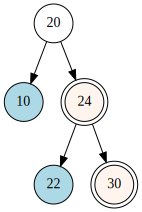

Number of nodes is: 5


In [65]:
b = BST(20)
b.insert(10)
b.insert(24)
b.insert(30)
b.insert(22)

visualize_tree(b)
print("Number of nodes is:", b.number_of_nodes())

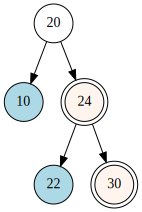

Height of tree is : 3


In [66]:
visualize_tree(b)
print("Height of tree is :", b.find_height())

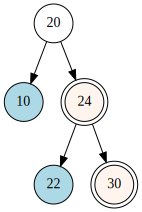

Tree is in BST : True


In [67]:
visualize_tree(b)
print("Tree is in BST :", b.BST_ensurity())

In [102]:
class DiGraph:
    def __init__(self):
        self.g = {}
        
    def add_node(self, node):
        self.g[node] = []
        
    def add_edge(self, source_node, destination_node):
        if source_node not in self.g:
            raise KeyError("Source node is not present in graph")
        
        if destination_node not in self.g:
            raise KeyError("Destination node is not present in graph")
        
        l = self.g[source_node]
        if destination_node not in l:
            l.append(destination_node)
    
 

In [101]:
graph = DiGraph()

nodes = ['a', 'b', 'c', 'd', 'e']
for n in nodes:
    graph.add_node(n)
    
graph.add_edge('a', 'b')
graph.add_edge('a', 'c')
graph.add_edge('c', 'b')
graph.add_edge('b', 'e')
graph.add_edge('e', 'd')
print(graph.g)
    

{'a': ['b', 'c'], 'b': ['e'], 'c': ['b'], 'd': [], 'e': ['d']}
